## 2 Frequency Scatter Plot
The purpose of this plot is to show the relationship between the frquency of 7mers in the 3'UTRs and mature data. In the future, I want to also include the frequency of each nucleotide in the sequence for categorization.

In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

Step one is to create a table of readable data. For this, I will first convert the 7mer 2D map into a 1D list. 

In [12]:
df = pd.read_csv("AGTC-7seq.csv", header = None)
df =pd.DataFrame(np.array(df).flatten())
df.to_csv('flatten_AGTC-7seq.csv', index= False, header = False)

Now lets do the same thing with the 3'UTR frequency

In [13]:
df = pd.read_csv("3'UTR Frequency.csv", header = None)
df =pd.DataFrame(np.array(df).flatten())
df.to_csv("flatten_3' UTR Frequency.csv", index= False, header = False)

Using that as a dictionary, we can now collect the abundance of 7mer sequences in the dre_mature miRNA and compare that to the abundance of the reverse complement in the zebrafish genome. I've combined the two tables into one table titled "Seed Match Abundance Data"

Now, lets first count the occurance of 7mer seeds in dre_mature miRNA. The following script takes dre_mature and returns a list of seeds corresponding to each miRNA.

In [35]:
from numpy import loadtxt
import pandas as pd
def getSeed(filename, x1, x2):
    #import file
    filename_data = loadtxt(filename+".txt", comments=">", delimiter="\z",dtype="str")
    
    #substring from x1, x2
    filename_data = [sub[x1:x2] for sub in filename_data]

    return filename_data

def print_text(filename, arr):
    with open(filename+".txt", "w+") as file:
        for item in arr:
            file.write("%s\n" % item)
    file.close()

print_text("dre_mature_seeds", getSeed("dre_mature", 1,8))

Now we have to count the number of occurances of each string. To do this, lets first create a dictionary of {Seed: Abundance}, then print the corresponding abundance for each seed. 

In [40]:
import csv
def makeSeedDict(filename):
    filename_data = loadtxt(filename+".txt", comments=">", delimiter="\z",dtype="str")
    count={}
    for c in filename_data:
        count[c]=count.setdefault(c, 0)+1
        
    with open(filename+' dict.csv', 'w') as csvfile:
        for key in count.keys():
            csvfile.write("%s, %s\n" % (key, count[key]))
    
    return count
makeSeedDict("dre_mature_seeds")

{'GAGGUAG': 21,
 'GGAAUGU': 4,
 'GGAAGAC': 5,
 'AAUACUG': 4,
 'AACACUG': 2,
 'CUUUGGU': 7,
 'ACCCUGU': 5,
 'CCCUGUA': 5,
 'ACCCGUA': 4,
 'CCCUGAG': 6,
 'AGCAGCA': 8,
 'AGCAGCG': 1,
 'CCAAUAU': 1,
 'CCAGUAU': 1,
 'AAAGUGC': 6,
 'AAGGUGC': 3,
 'GUGCAAA': 6,
 'AGCUUAU': 2,
 'AGCUGCC': 3,
 'UCACAUU': 5,
 'GGCUCAG': 5,
 'UCAAGUA': 4,
 'UCACAGU': 5,
 'AGCACCA': 4,
 'CUGAAUU': 1,
 'GUAAACA': 7,
 'GGCAAGA': 1,
 'AAUGUUC': 1,
 'GGCAGUG': 3,
 'AUUGCAC': 5,
 'UUGGCAC': 1,
 'UUGGCAA': 1,
 'AUGGCAC': 1,
 'UGGCACU': 1,
 'ACAGUAC': 2,
 'UACAGUA': 3,
 'GCAGCAU': 4,
 'GGAGUGU': 1,
 'AAGGCAC': 6,
 'UAAGGCA': 6,
 'CGUACCG': 2,
 'AUUAUUA': 2,
 'UCGUACC': 2,
 'CACAGUG': 3,
 'UUUUUGC': 4,
 'AGUGCAA': 8,
 'CUUUGAC': 1,
 'AACAGUC': 4,
 'CCUUGGC': 2,
 'UUGGUCC': 4,
 'UGGUCCC': 4,
 'AUGGCUU': 4,
 'UAUUGCU': 2,
 'AUUGCUU': 2,
 'GCUGGUG': 2,
 'CUACAGU': 1,
 'CCACAGG': 1,
 'ACCACAG': 1,
 'AUAAAGU': 3,
 'UAGUGUU': 2,
 'GUAGUGU': 2,
 'CCAUAAA': 1,
 'GAGAUGA': 1,
 'ACAGUAU': 1,
 'UCCAGUU': 1,
 'GAGAACU': 2,
 'UGAGAAC

Now we can generate the list of seed matches (reverse complements) and do the same process again. Below, I generate the list of seed matches. 

In [41]:
from numpy import loadtxt
import pandas as pd
def reverse_compliment(filename):
    #import file
    filename_data = loadtxt(filename+".txt", comments=">", delimiter="\z",dtype="str")

    #Replace A with X
    filename_data = [sub.replace('A', 'X') for sub in filename_data]
    
    #Replace U with A
    filename_data = [sub.replace('U', 'A') for sub in filename_data]
    
    #Replace X with U
    filename_data = [sub.replace('X', 'U') for sub in filename_data]
    
    #Replace C with X
    filename_data = [sub.replace('C', 'X') for sub in filename_data]
    
    #Replace G with C
    filename_data = [sub.replace('G', 'C') for sub in filename_data]
    
    #Replace X with G
    filename_data = [sub.replace('X', 'G') for sub in filename_data]
    
    #Reverse all the strings
    filename_data_reverse = [sub[::-1] for sub in filename_data]
    
    return filename_data_reverse

def print_text(filename, arr):
    with open(filename+".txt", "w+") as file:
        for item in arr:
            file.write("%s\n" % item)
    file.close()

print_text("reverse_mature_seeds", reverse_compliment("dre_mature_seeds"))

Instead of counting their abundance in the list, we will pull their abundance from the zebrafish genome. 

In [48]:
import csv

def get_dict(filename):
    dict_from_csv = {}

    with open(filename+'.csv', mode='r') as inp:
        reader = csv.reader(inp)
        dict_from_csv = {rows[0]:rows[1] for rows in reader}
    return dict_from_csv

def makeMatchDict(filename):
    filename_data = loadtxt(filename+".txt", comments=">", delimiter="\z",dtype="str")
    matchData = get_dict("Seed Match Abundance Data")
    count={}
    for c in filename_data:
        count[c]=matchData[c]
        
    with open(filename+' dict.csv', 'w') as csvfile:
        for key in count.keys():
            csvfile.write("%s, %s\n" % (key, count[key]))
    
    return count
makeMatchDict("reverse_mature_seeds")

{'CUACCUC': '590',
 'ACAUUCC': '1537',
 'GUCUUCC': '830',
 'CAGUAUU': '3621',
 'CAGUGUU': '4223',
 'ACCAAAG': '1731',
 'ACAGGGU': '1085',
 'UACAGGG': '854',
 'UACGGGU': '189',
 'CUCAGGG': '824',
 'UGCUGCU': '3337',
 'CGCUGCU': '772',
 'AUAUUGG': '1687',
 'AUACUGG': '1098',
 'GCACUUU': '3040',
 'GCACCUU': '1027',
 'UUUGCAC': '3051',
 'AUAAGCU': '1561',
 'GGCAGCU': '827',
 'AAUGUGA': '4336',
 'CUGAGCC': '1060',
 'UACUUGA': '2037',
 'ACUGUGA': '3169',
 'UGGUGCU': '1686',
 'AAUUCAG': '2679',
 'UGUUUAC': '4809',
 'UCUUGCC': '813',
 'GAACAUU': '3040',
 'CACUGCC': '1219',
 'GUGCAAU': '1894',
 'GUGCCAA': '1294',
 'UUGCCAA': '1781',
 'GUGCCAU': '1408',
 'AGUGCCA': '1280',
 'GUACUGU': '2585',
 'UACUGUA': '5421',
 'AUGCUGC': '1962',
 'ACACUCC': '1154',
 'GUGCCUU': '1657',
 'UGCCUUA': '1761',
 'CGGUACG': '110',
 'UAAUAAU': '9239',
 'GGUACGA': '167',
 'CACUGUG': '2763',
 'GCAAAAA': '3917',
 'UUGCACU': '2609',
 'GUCAAAG': '1503',
 'GACUGUU': '2350',
 'GCCAAGG': '433',
 'GGACCAA': '1061',
 'GGGACCA':

Ok, now lets combine the spreadsheets together into the "dre_mature abundance data" (TODO: Automate this process. For now, I'm copying and pasting)

The final file is frequency_7mer.csv. We can now use seaborne to make the scatter plot. 

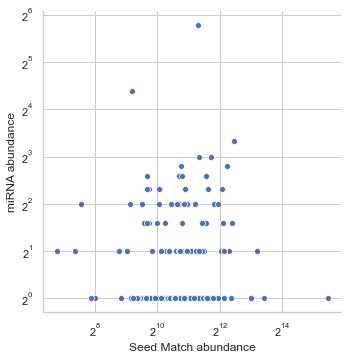

In [53]:
sns.set(style="whitegrid")


# Load the frequency_7mer dataset
sequence_data = pd.read_csv("dre_mature abundance data.csv")

g = sns.relplot(
    data=sequence_data,
    x="Seed Match abundance", 
    y="miRNA abundance",
    palette=cmap)
plt.xscale('log', basex=2)
plt.yscale('log', basey=2)




g.savefig("frequency_7mer scatter plot.png") 